In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [3]:
df = pd.read_csv(r'C:\Users\NET\Desktop\data work\data\Car_Sales.csv')
df.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [4]:
df.shape

(23906, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [8]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [9]:
df['car_model']= df['Company']+' '+ df['Model']

In [10]:
df.select_dtypes(['object']).columns

Index(['Car_id', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style',
       'Dealer_Region', 'car_model'],
      dtype='object')

In [11]:
df.drop(columns=['Car_id', 'Customer Name', 'Company', 'Model',
       'Dealer_No ', 'Body Style'], inplace=True)

In [12]:
df

,Date,Gender,Annual Income,Dealer_Name,Engine,Transmission,Color,Price ($),Phone,Dealer_Region,car_model
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,DoubleÂ Overhead Camshaft,Auto,Black,26000,8264678,Middletown,Ford Expedition
1,2022-01-02,Male,1480000,C & M Motors Inc,DoubleÂ Overhead Camshaft,Auto,Black,19000,6848189,Aurora,Dodge Durango
2,2022-01-02,Male,1035000,Capitol KIA,Overhead Camshaft,Manual,Red,31500,7298798,Greenville,Cadillac Eldorado
3,2022-01-02,Male,13500,Chrysler of Tri-Cities,Overhead Camshaft,Manual,Pale White,14000,6257557,Pasco,Toyota Celica
4,2022-01-02,Male,1465000,Chrysler Plymouth,DoubleÂ Overhead Camshaft,Auto,Red,24500,7081483,Janesville,Acura TL
...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,Male,13500,C & M Motors Inc,Overhead Camshaft,Manual,Red,12000,8583598,Pasco,Plymouth Voyager
23902,2023-12-31,Female,900000,Ryder Truck Rental and Leasing,DoubleÂ Overhead Camshaft,Auto,Black,16000,7914229,Middletown,Chevrolet Prizm
23903,2023-12-31,Male,705000,Chrysler of Tri-Cities,Overhead Camshaft,Manual,Red,21000,7659127,Scottsdale,BMW 328i
23904,2023-12-31,Male,13500,Chrysler Plymouth,DoubleÂ Overhead Camshaft,Auto,Black,31000,6030764,Austin,Chevrolet Metro


In [13]:
df['Phone'] = df['Phone'].astype(str).apply(lambda x : "(+1)" + x)

In [14]:
df

,Date,Gender,Annual Income,Dealer_Name,Engine,Transmission,Color,Price ($),Phone,Dealer_Region,car_model
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,DoubleÂ Overhead Camshaft,Auto,Black,26000,(+1)8264678,Middletown,Ford Expedition
1,2022-01-02,Male,1480000,C & M Motors Inc,DoubleÂ Overhead Camshaft,Auto,Black,19000,(+1)6848189,Aurora,Dodge Durango
2,2022-01-02,Male,1035000,Capitol KIA,Overhead Camshaft,Manual,Red,31500,(+1)7298798,Greenville,Cadillac Eldorado
3,2022-01-02,Male,13500,Chrysler of Tri-Cities,Overhead Camshaft,Manual,Pale White,14000,(+1)6257557,Pasco,Toyota Celica
4,2022-01-02,Male,1465000,Chrysler Plymouth,DoubleÂ Overhead Camshaft,Auto,Red,24500,(+1)7081483,Janesville,Acura TL
...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,Male,13500,C & M Motors Inc,Overhead Camshaft,Manual,Red,12000,(+1)8583598,Pasco,Plymouth Voyager
23902,2023-12-31,Female,900000,Ryder Truck Rental and Leasing,DoubleÂ Overhead Camshaft,Auto,Black,16000,(+1)7914229,Middletown,Chevrolet Prizm
23903,2023-12-31,Male,705000,Chrysler of Tri-Cities,Overhead Camshaft,Manual,Red,21000,(+1)7659127,Scottsdale,BMW 328i
23904,2023-12-31,Male,13500,Chrysler Plymouth,DoubleÂ Overhead Camshaft,Auto,Black,31000,(+1)6030764,Austin,Chevrolet Metro


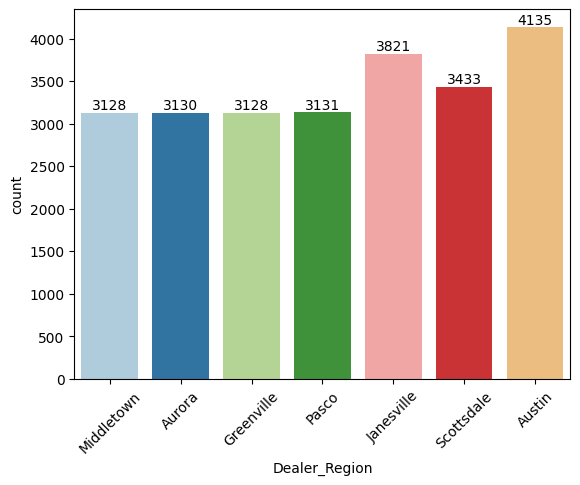

In [15]:
ax = sns.countplot(data= df , x=df['Dealer_Region'], palette="Paired")
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.show()

Austin and Janesville are in the head for the most region car solled


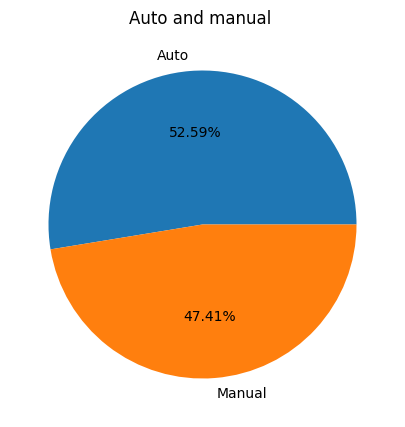

In [16]:
pier = df['Transmission'].value_counts()

# Plotting
plt.figure(figsize=(10, 5))
plt.pie(pier, autopct='%.2f%%', labels=pier.index)

plt.title('Auto and manual ')
#plt.tight_layout()
plt.show()

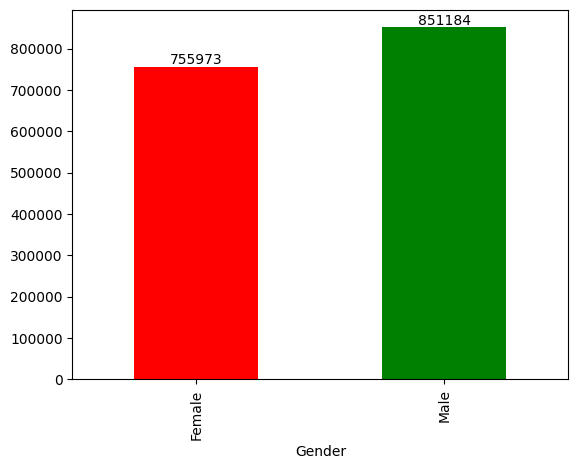

In [17]:
ax = df.groupby('Gender')['Annual Income'].mean().plot.bar(color={'r','g'})
ax.bar_label(ax.containers[0])
plt.show()


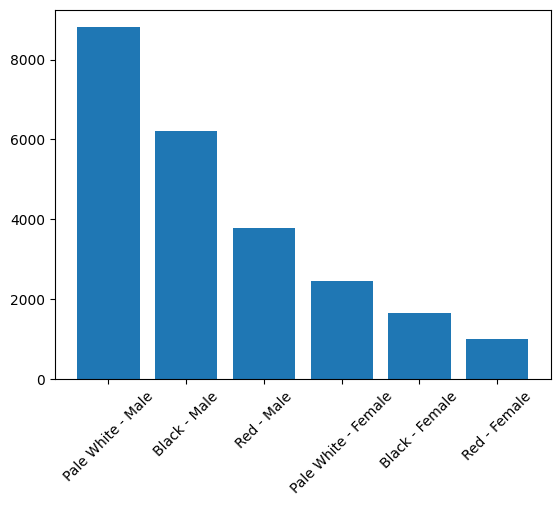

In [18]:
gr_co = df.groupby(['Color', 'Gender']).size().reset_index(name='total').sort_values('total', ascending=False)
ax = plt.bar(gr_co['Color'] + ' - ' + gr_co['Gender'], gr_co['total'])
plt.xticks(rotation=45)
plt.show()

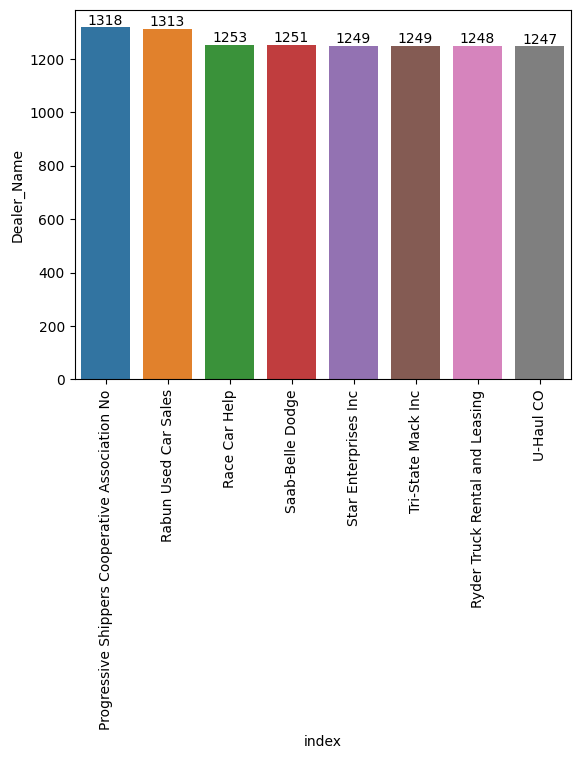

In [19]:
dealer = df['Dealer_Name'].value_counts().reset_index().head(8)
dealer
#viz 
ax = sns.barplot(data = dealer , x= dealer['index'], y = dealer['Dealer_Name'])
plt.xticks(rotation= 90)
ax.bar_label(ax.containers[0])
plt.show()



In [20]:
dea = df.groupby('Dealer_Region')['Dealer_Name'].value_counts()
dea = dea.groupby('Dealer_Region').head(1).to_frame()
dea.rename(columns={'Dealer_Region': 'Region','Dealer_Name': 'Dealer'}, inplace=True)
dea.reset_index()


,Dealer_Region,Dealer_Name,Dealer
0,Aurora,Saab-Belle Dodge,1009
1,Austin,Race Car Help,1019
2,Greenville,Scrivener Performance Engineering,1006
3,Janesville,Progressive Shippers Cooperative Association No,1069
4,Middletown,Ryder Truck Rental and Leasing,1008
5,Pasco,Star Enterprises Inc,1009
6,Scottsdale,Rabun Used Car Sales,950


In [21]:
car = df.groupby('Gender')['car_model'].value_counts()
car.groupby('Gender').head(5).to_frame()

car_model
Gender car_model                       
Female Chevrolet Prizm               98
       Acura RL                      93
       Volkswagen Jetta              85
       Mitsubishi Diamante           83
       Lexus LS400                   81
Male   Oldsmobile Silhouette        341
       Mitsubishi Diamante          335
       Dodge Ram Pickup             314
       Chevrolet Prizm              313
       Volkswagen Passat            312

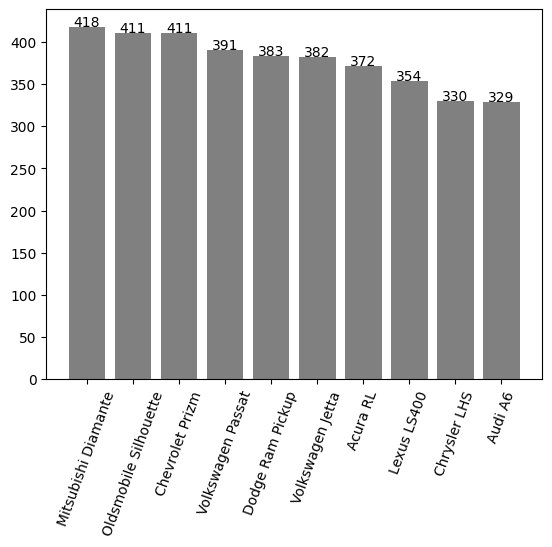

In [22]:
cars = df['car_model'].value_counts().head(10)
plt.bar(data=cars, x=cars.index , height=cars.values, color='gray')
plt.xticks(rotation=70)
offset = 0.9
for i, j in enumerate(cars.values):
    plt.text(cars.index[i], cars.values[i]+ offset,str(f'{j}'), ha= 'center')

C:\Users\NET\AppData\Local\Temp\ipykernel_3528\3044336995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['year']= df['Date'].dt.year
C:\Users\NET\AppData\Local\Temp\ipykernel_3528\3044336995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['month']= df['Date'].dt.month


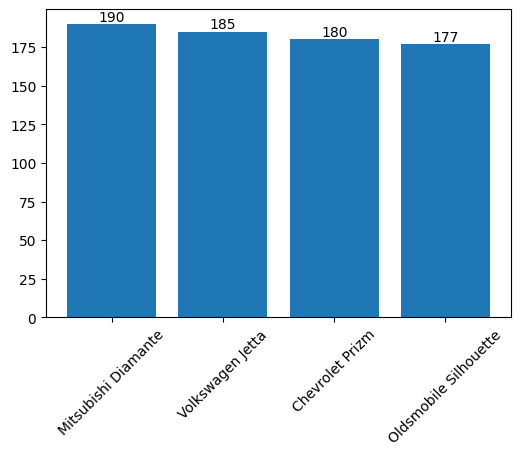

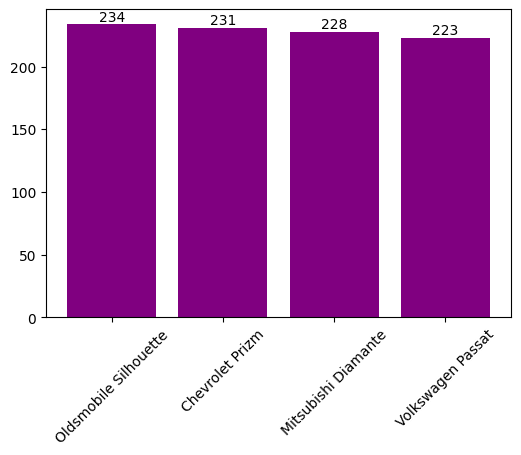

In [23]:
val =  df[['Date','car_model']]
val['year']= df['Date'].dt.year
val['month']= df['Date'].dt.month
val = val.groupby('year')['car_model'].value_counts().reset_index(name='count')
vals = val.groupby('year').head(4).reset_index(drop=True)
vals22 = vals.loc[vals['year']== 2022]
vals23 = vals.loc[vals['year']== 2023]
fig , axs= plt.subplots(1,1, figsize=(6,4))
ax = plt.bar(data= vals22, x=vals22['car_model'], height=vals22['count'])
plt.bar_label(ax, labels=vals22['count'], label_type='edge')
plt.xticks(rotation= 45)
#2023
fig , axs= plt.subplots(1,1, figsize=(6,4))
ax3 = plt.bar(data= vals23, x=vals23['car_model'], height=vals23['count'], color= 'purple')
plt.bar_label(ax3, labels=vals23['count'], label_type='edge')
plt.xticks(rotation= 45)
plt.show()

C:\Users\NET\AppData\Local\Temp\ipykernel_3528\614883688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['year']= df['Date'].dt.year
C:\Users\NET\AppData\Local\Temp\ipykernel_3528\614883688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['month']= df['Date'].dt.month


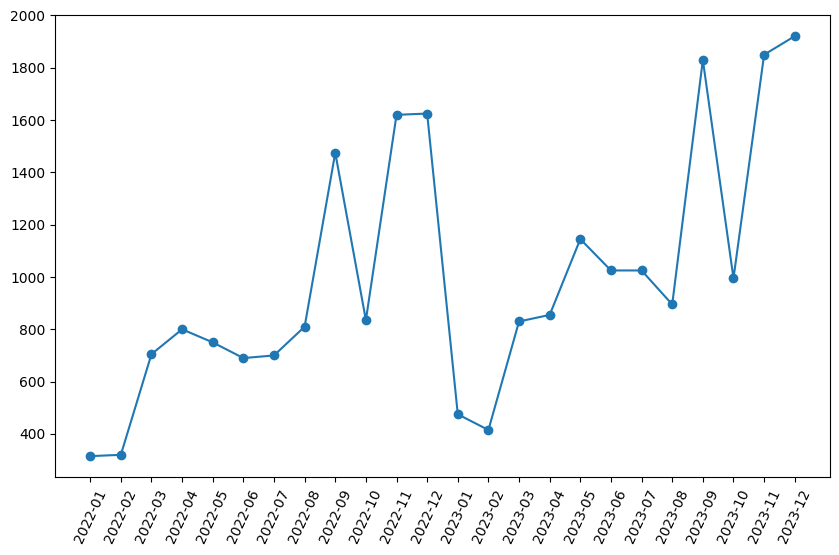

In [24]:
val =  df[['Date','car_model']]
val['year']= df['Date'].dt.year
val['month']= df['Date'].dt.month
counts = val.groupby(['year', 'month']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(counts['year'].astype(str) + '-' + counts['month'].astype(str).str.zfill(2), counts['count'], marker='o')
plt.xticks(rotation= 65)
plt.show()

###analyst statistical


In [25]:
df.corr()

C:\Users\NET\AppData\Local\Temp\ipykernel_3528\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Annual Income,Price ($)
Annual Income,1.000000,0.012065
Price ($),0.012065,1.000000


In [26]:
from scipy.stats import chi2_contingency

def corr_chi2(df, columns):
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)): 
            Crosstab = pd.crosstab(df[columns[i]], df[columns[j]])
            stat, p, dof, expected = chi2_contingency(Crosstab)
            alpha = 0.05
            correlation = "correlated" if p < alpha else "not correlated"
            print(f"Columns {columns[i]} and {columns[j]} are {correlation} with p-value {p:.4f}")

columns = ['Gender', 'Dealer_Name', 'Engine', 'Transmission', 'Color', 'Dealer_Region', 'car_model']
corr_chi2(df, columns)


Columns Gender and Dealer_Name are not correlated with p-value 0.3406
Columns Gender and Engine are not correlated with p-value 0.6940
Columns Gender and Transmission are not correlated with p-value 0.6940
Columns Gender and Color are not correlated with p-value 0.3979
Columns Gender and Dealer_Region are not correlated with p-value 0.3192
Columns Gender and car_model are not correlated with p-value 0.4597
Columns Dealer_Name and Engine are not correlated with p-value 0.9899
Columns Dealer_Name and Transmission are not correlated with p-value 0.9899
Columns Dealer_Name and Color are not correlated with p-value 0.9861
Columns Dealer_Name and Dealer_Region are correlated with p-value 0.0000
Columns Dealer_Name and car_model are not correlated with p-value 1.0000
Columns Engine and Transmission are correlated with p-value 0.0000
Columns Engine and Color are not correlated with p-value 0.5046
Columns Engine and Dealer_Region are not correlated with p-value 0.5973
Columns Engine and car_mod